<a href="https://colab.research.google.com/github/DrTihami/Neural-Network-Project/blob/main/Scaler_Porter_NN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The goal is to estimate delivery times accurately using various attributes to enhance customer satisfaction and optimise logistic operations.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('/content/dataset.csv')
df1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [4]:
df=df1.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

There are some null values in some of the features of the data set.


In [6]:
# shape
df.shape

(197428, 14)

The data set has 197428 rows and 14 columns.

In [7]:
# Display data types of each column
print(df.dtypes)

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object


In [8]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
correlation_matrix

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
market_id,1.000000,-0.021895,-0.006855,-0.016237,0.002557,-0.000150,-0.004921,0.069752,0.060488,0.063754
order_protocol,-0.021895,1.000000,0.008790,-0.053623,-0.023342,-0.045421,-0.090960,0.145022,0.149584,0.134895
total_items,-0.006855,0.008790,1.000000,0.558067,0.763912,-0.393149,-0.058233,0.031732,0.028602,0.034380
subtotal,-0.016237,-0.053623,0.558067,1.000000,0.681101,0.037038,0.505547,0.130831,0.125566,0.130106
num_distinct_items,0.002557,-0.023342,0.763912,0.681101,1.000000,-0.448739,0.041871,0.065943,0.060638,0.067800
min_item_price,-0.000150,-0.045421,-0.393149,0.037038,-0.448739,1.000000,0.545484,0.042368,0.043881,0.041002
max_item_price,-0.004921,-0.090960,-0.058233,0.505547,0.041871,0.545484,1.000000,0.133113,0.131005,0.130676
total_onshift_partners,0.069752,0.145022,0.031732,0.130831,0.065943,0.042368,0.133113,1.000000,0.943789,0.936122
total_busy_partners,0.060488,0.149584,0.028602,0.125566,0.060638,0.043881,0.131005,0.943789,1.000000,0.932913
total_outstanding_orders,0.063754,0.134895,0.034380,0.130106,0.067800,0.041002,0.130676,0.936122,0.932913,1.000000


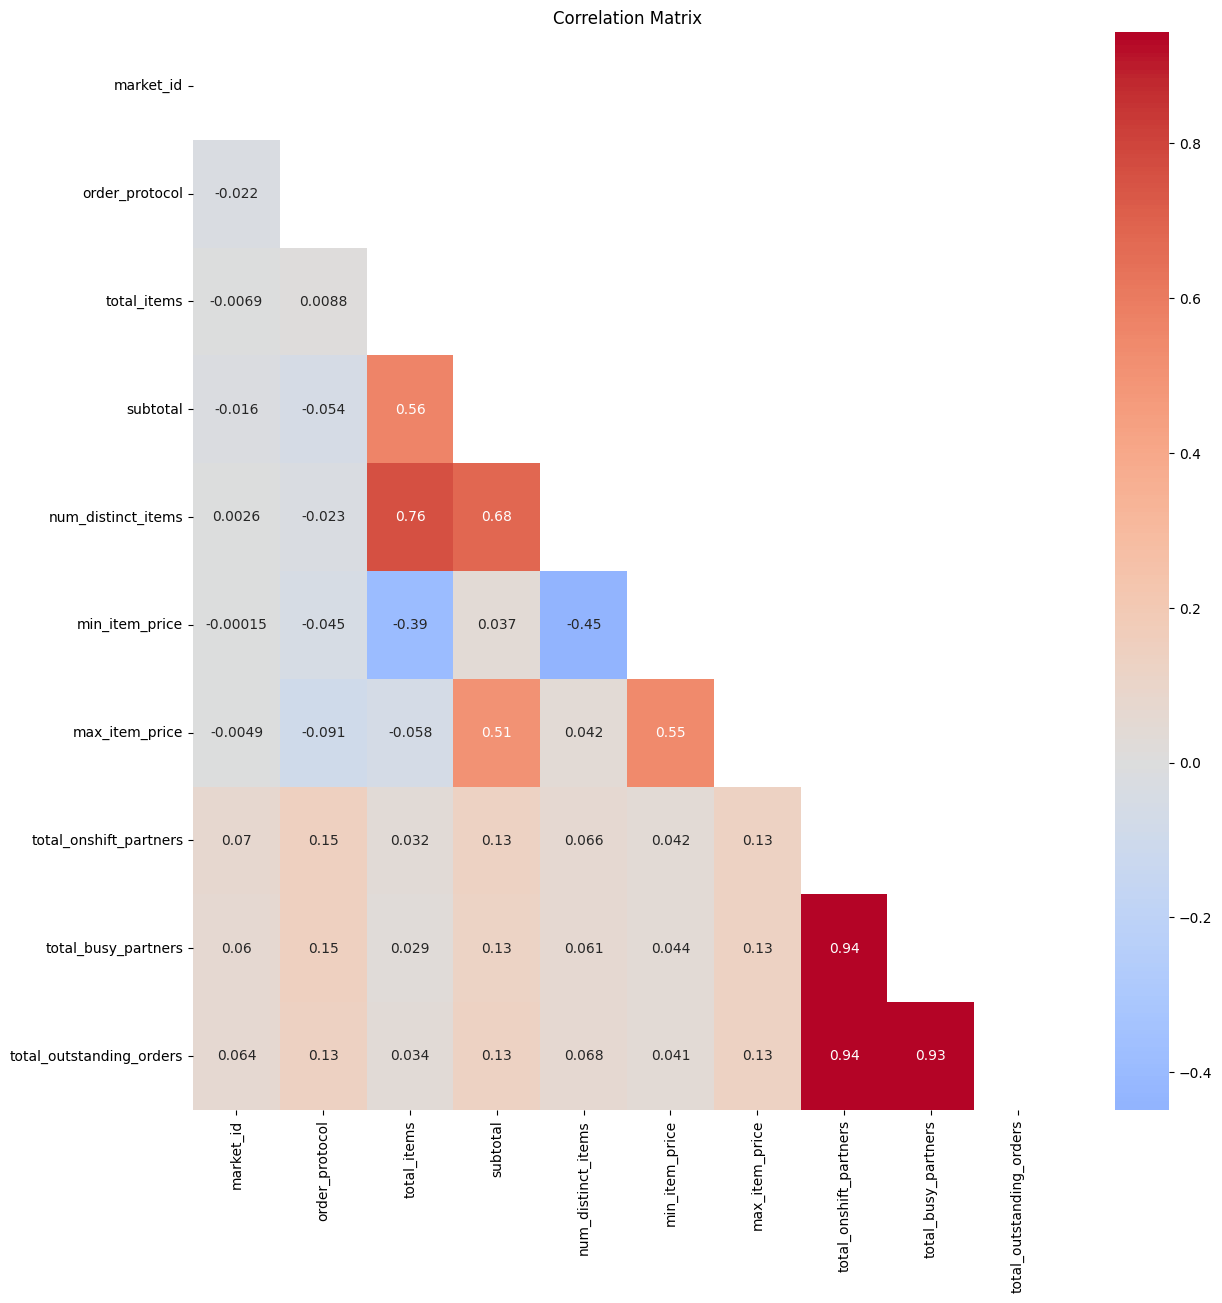

In [91]:
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), center=0)
plt.title('Correlation Matrix')
plt.show()

There is high positive correlation between total busy partners and total on shift partners, total outstanding orders and total on shift partners and total busy partners.

In [10]:
# Detect missing values
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


There are 987 missing values in market_id, 7 in actual_delivery_time, 1 in store_id, 4760 in store_primary_category, 995 in order_protocol & 16262 each in total_onshift_partners, total_busy_partners, total_outstanding_orders.

In [11]:
# Statistical summary
df.describe()


,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


There are 197428 maximum count

In [12]:
# Statistical summary of categorical columns
df.describe(include=[object])

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


In [13]:
# Value counts for categorical columns
print("\nValue counts for categorical columns:")
for column in df.select_dtypes(include=[object]).columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())


Value counts for categorical columns:

Value counts for created_at:
created_at
2015-02-11 19:50:43    6
2015-01-24 01:56:33    6
2015-02-16 01:48:11    5
2015-02-08 02:20:03    5
2015-02-11 19:51:06    5
                      ..
2015-02-16 02:42:32    1
2015-02-03 04:17:32    1
2015-02-15 01:09:16    1
2015-01-24 00:31:06    1
2015-02-01 18:18:15    1
Name: count, Length: 180985, dtype: int64

Value counts for actual_delivery_time:
actual_delivery_time
2015-02-11 20:40:45    5
2015-02-16 03:51:49    5
2015-02-12 03:14:14    5
2015-01-24 03:41:03    5
2015-02-01 03:44:13    5
                      ..
2015-02-10 02:42:43    1
2015-02-14 04:07:50    1
2015-02-15 22:06:14    1
2015-02-17 04:24:59    1
2015-02-08 20:01:41    1
Name: count, Length: 178110, dtype: int64

Value counts for store_id:
store_id
d43ab110ab2489d6b9b2caa394bf920f    937
757b505cfd34c64c85ca5b5690ee5293    863
faacbcd5bf1d018912c116bf2783e9a1    815
cfecdb276f634854f3ef915e2e980c31    765
45c48cce2e2d7fbdea1afc51c7c6

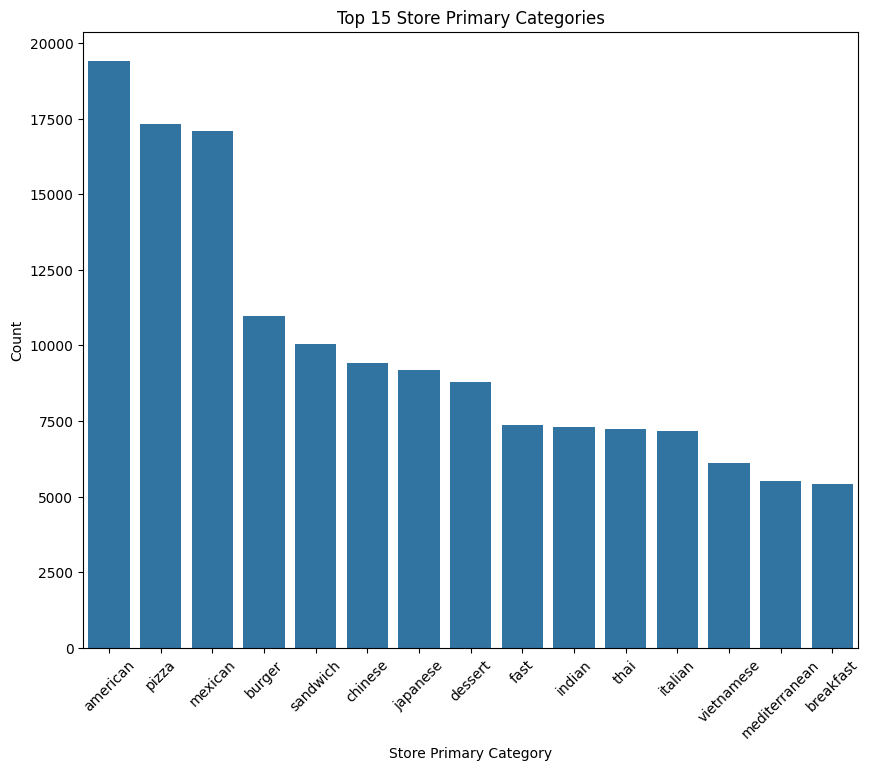

In [14]:
# Countplots
# Calculate the count of each category
category_counts = df['store_primary_category'].value_counts()

# Select the top 15 categories (or fewer if less than 15 categories exist)
top_categories = category_counts.head(15)

# Plotting the top 15 categories
plt.figure(figsize=(10, 8))
sns.countplot(x='store_primary_category', data=df[df['store_primary_category'].isin(top_categories.index)], order=top_categories.index)
plt.title('Top 15 Store Primary Categories')
plt.ylabel('Count')
plt.xlabel('Store Primary Category')
plt.xticks(rotation=45)
plt.show()

American, Pizza and Mexican are most ordered items

In [15]:
# Replacing missing values
from sklearn.impute import KNNImputer

#3wscbfdxx Instantiate KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNNImputer to numerical columns
numerical_columns = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

Imputing the missing values of important features for deciding the estimated delivery time of orders.

In [16]:
df= df.dropna()

In [17]:
df.isna().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [18]:
# Converting timestamps 'created_at' and 'actual_delivery_time' to datetime
df['Order_time'] = pd.to_datetime(df['created_at'])
df['Delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Calculate estimated_delivery_time, seconds/60 = in minutes
df['Estimated_delivery_time'] = (df['Delivery_time'] - df['Order_time']).dt.total_seconds() / 60.0

# Extracting features from datetime
df['Order_hour'] = df['Order_time'].dt.hour
df['Order_dayofweek'] = df['Order_time'].dt.dayofweek
df['Delivery_hour'] = df['Delivery_time'].dt.hour
df['Delivery_dayofweek'] = df['Delivery_time'].dt.dayofweek

# Drop the original timestamp columns
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

# Checking the df
df.head()

<ipython-input-18-1702d0bac789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_time'] = pd.to_datetime(df['created_at'])


,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Order_time,Delivery_time,Estimated_delivery_time,Order_hour,Order_dayofweek,Delivery_hour,Delivery_dayofweek
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,2015-02-06 22:24:17,2015-02-06 23:27:16,62.983333,22,4,23,4
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,67.066667,21,1,22,1
8,2.0,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,2015-02-16 00:11:35,2015-02-16 00:38:01,26.433333,0,0,0,0
14,1.0,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,2015-02-12 03:36:46,2015-02-12 04:14:39,37.883333,3,3,4,3
15,1.0,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,2015-01-27 02:12:36,2015-01-27 03:02:24,49.800000,2,1,3,1


In [19]:
# Convert remaining categorical columns to strings if necessary
df['store_primary_category'] = df['store_primary_category'].astype(str)
df['order_protocol'] = df['order_protocol'].astype(str)

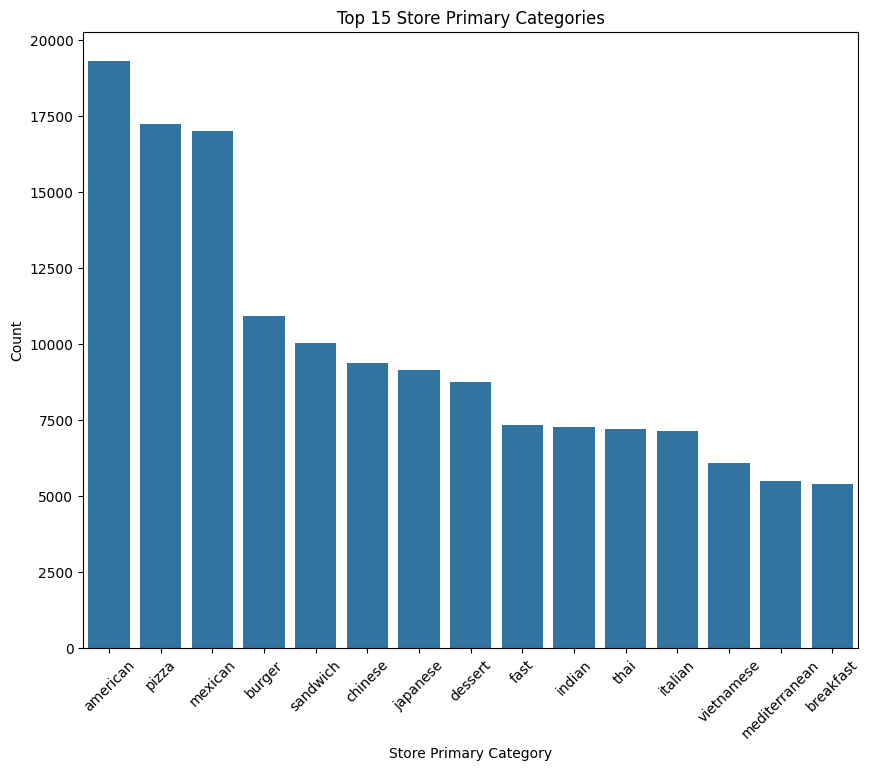

In [20]:
# Countplots
# Calculate the count of each category
category_counts = df['store_primary_category'].value_counts()

# Select the top 15 categories (or fewer if less than 15 categories exist)
top_categories = category_counts.head(15)

# Plotting the top 15 categories
plt.figure(figsize=(10, 8))
sns.countplot(x='store_primary_category', data=df[df['store_primary_category'].isin(top_categories.index)], order=top_categories.index)
plt.title('Top 15 Store Primary Categories')
plt.ylabel('Count')
plt.xlabel('Store Primary Category')
plt.xticks(rotation=45)
plt.show()

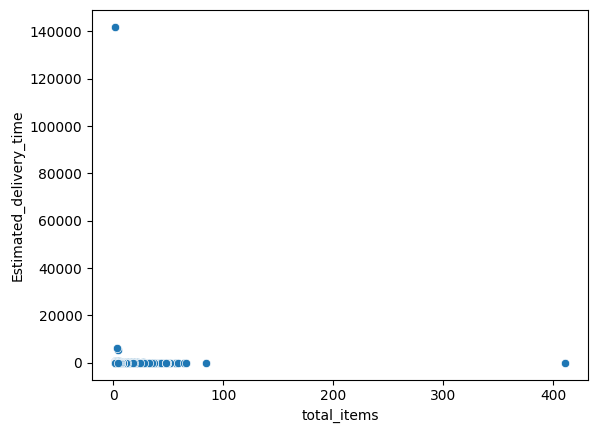

In [21]:
# Scatterplots
sns.scatterplot(x='total_items', y='Estimated_delivery_time', data=df)
plt.show()

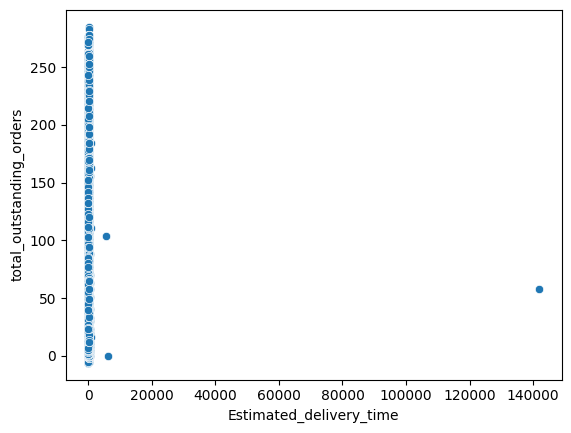

In [22]:
# Scatterplots
sns.scatterplot(y='total_outstanding_orders', x='Estimated_delivery_time', data=df)
plt.show()

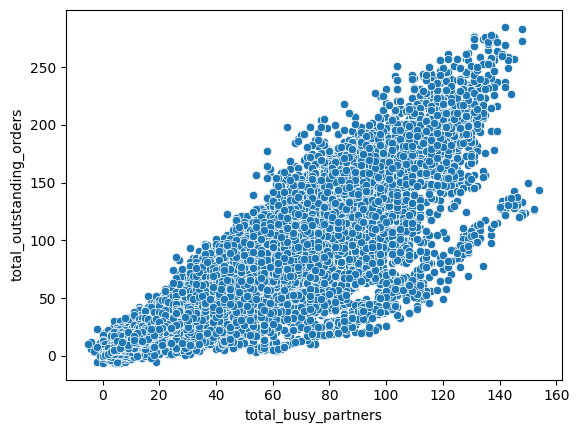

In [23]:
# Scatterplots
sns.scatterplot(y='total_outstanding_orders', x='total_busy_partners', data=df)
plt.show()

When there is high number of total_busy_partners, the number of total_outstanding_orders will increase consequently.

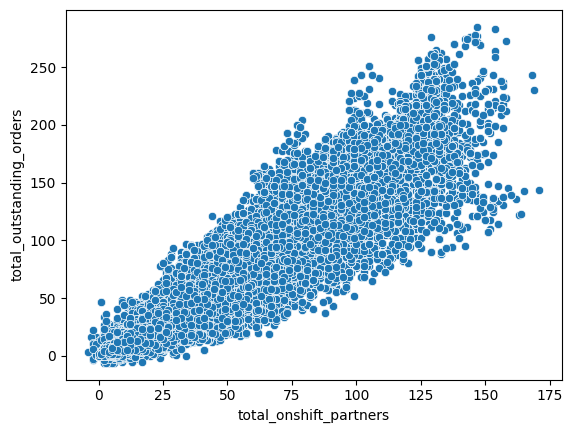

In [24]:
# Scatterplots
sns.scatterplot(y='total_outstanding_orders', x='total_onshift_partners', data=df)
plt.show()

As total_onshift_partners increase the total_outstandin_orders increase.

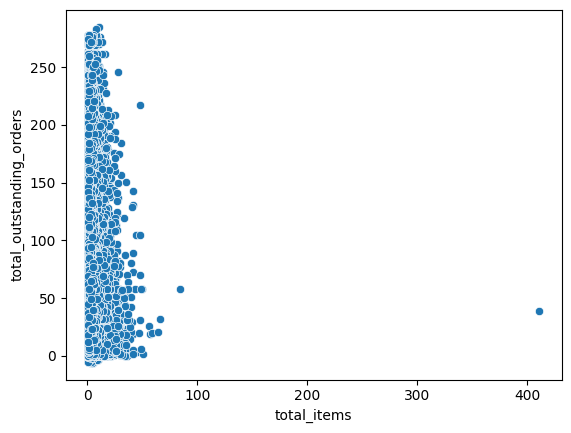

In [25]:
# Scatterplots
sns.scatterplot(y='total_outstanding_orders', x='total_items', data=df)
plt.show()

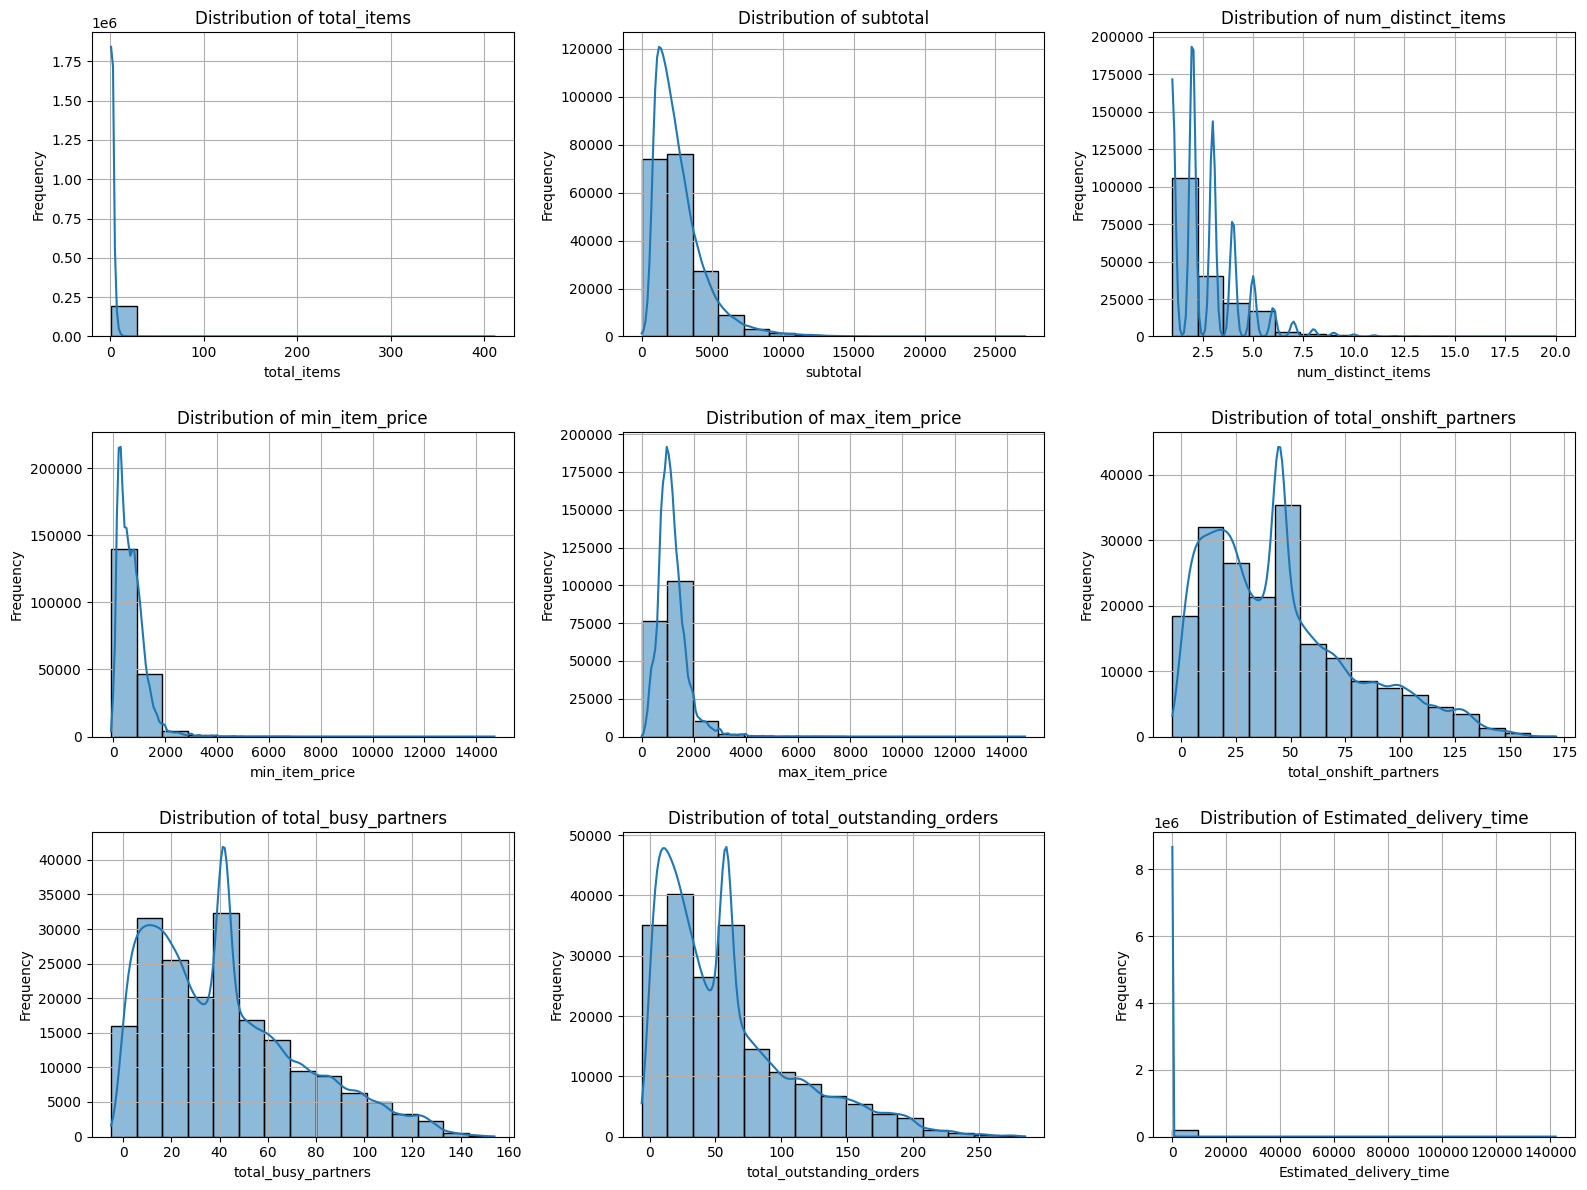

In [26]:
# List of continuous variables
continuous_vars = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                   'max_item_price', 'total_onshift_partners', 'total_busy_partners',
                   'total_outstanding_orders', 'Estimated_delivery_time']

# Histograms for continuous variables
plt.figure(figsize=(16, 12))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=15)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

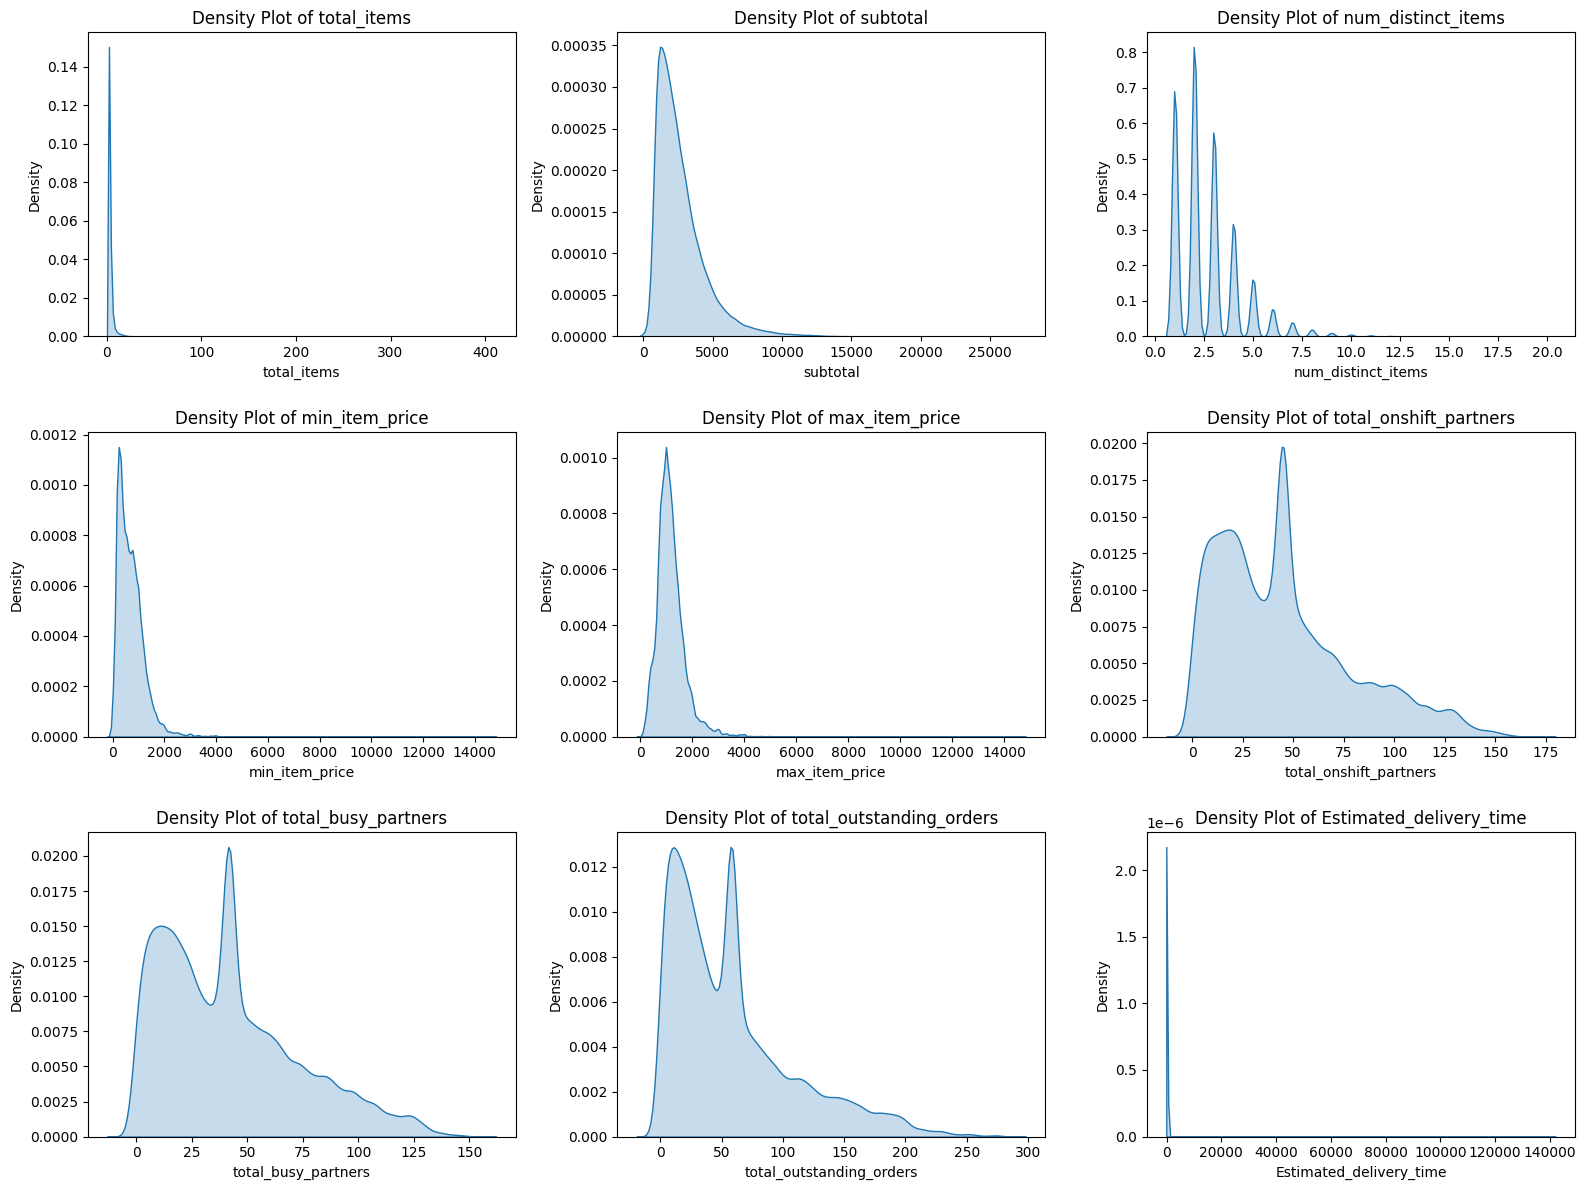

In [27]:
# Plot density plots for continuous variables
plt.figure(figsize=(16, 12))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(df[var], fill=True)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

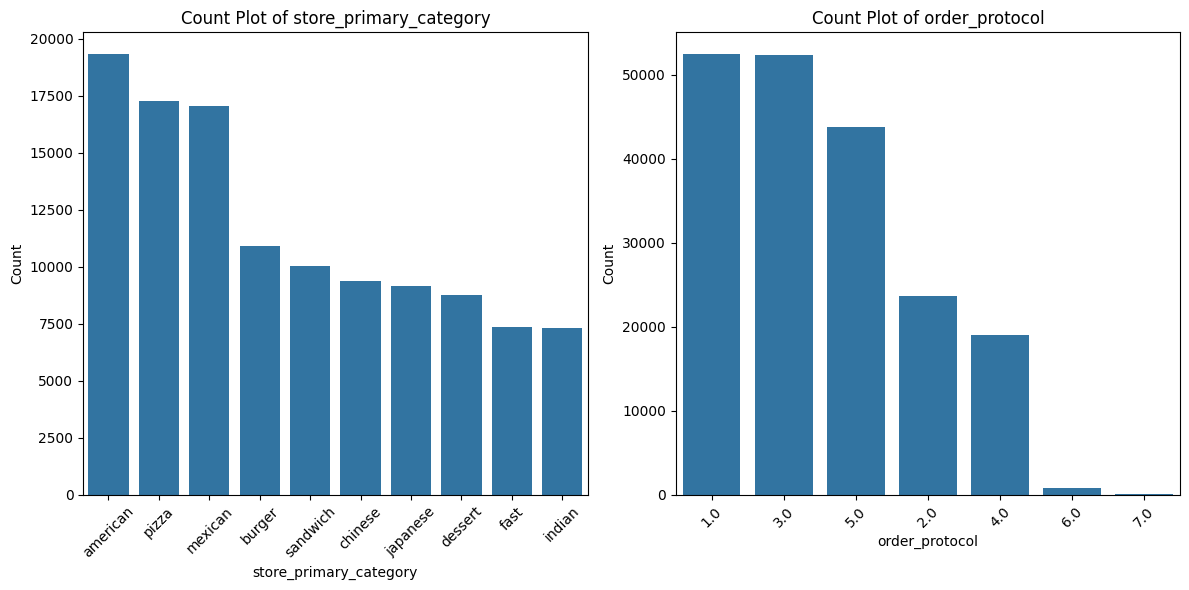

In [28]:
# List of categorical variables (from your dataset)
categorical_vars = ['store_primary_category', 'order_protocol']

# Plot count plots for categorical variables
plt.figure(figsize=(12, 6))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=var, order=df[var].value_counts().head(10).index)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better readability


plt.tight_layout()
plt.show()

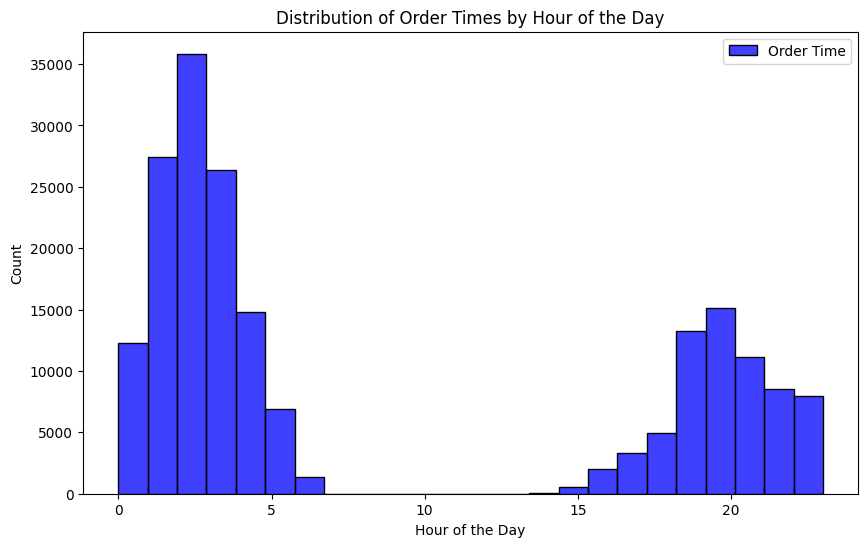

In [29]:
# Plotting the count of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(df['Order_hour'], bins=24, kde=False, color='blue', label='Order Time')
plt.title('Distribution of Order Times by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()

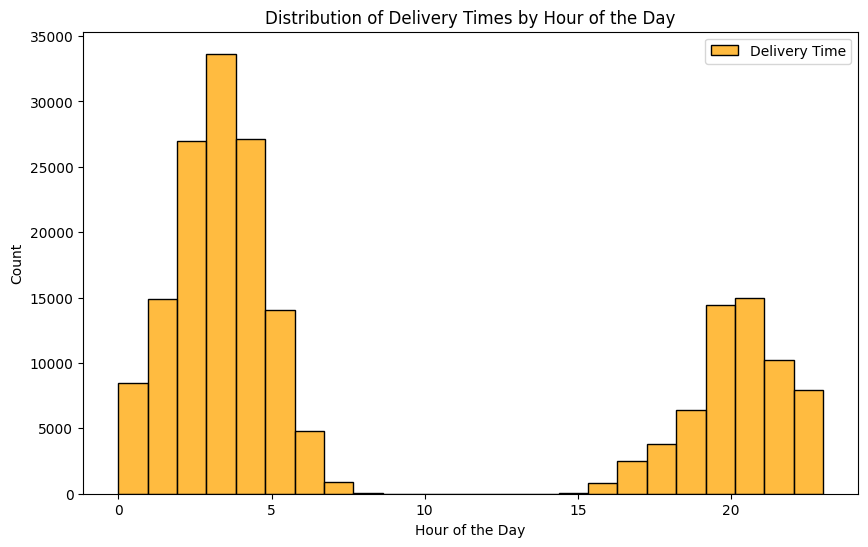

In [30]:
# Plotting the count of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_hour'], bins=24, kde=False, color='orange', label='Delivery Time')
plt.title('Distribution of Delivery Times by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()

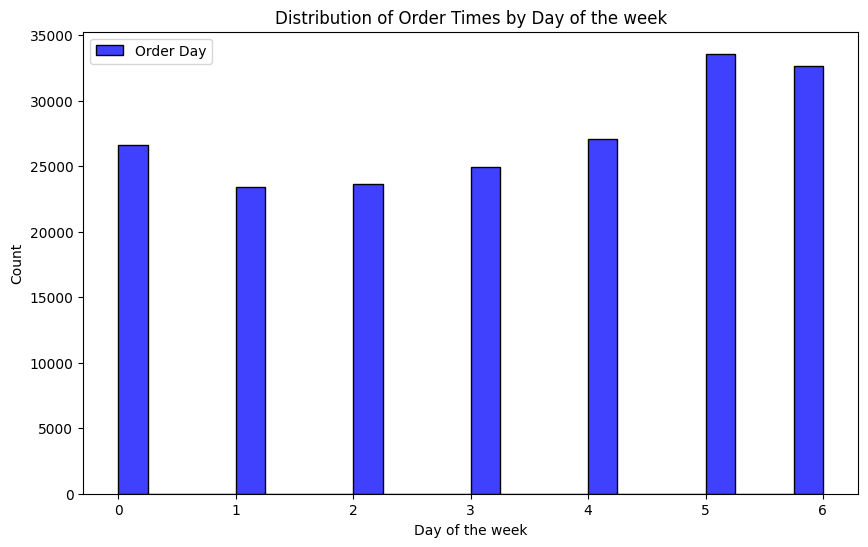

In [31]:
# Plotting the count of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(df['Order_dayofweek'], bins=24, kde=False, color='blue', label='Order Day')
plt.title('Distribution of Order Times by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.legend()
plt.show()

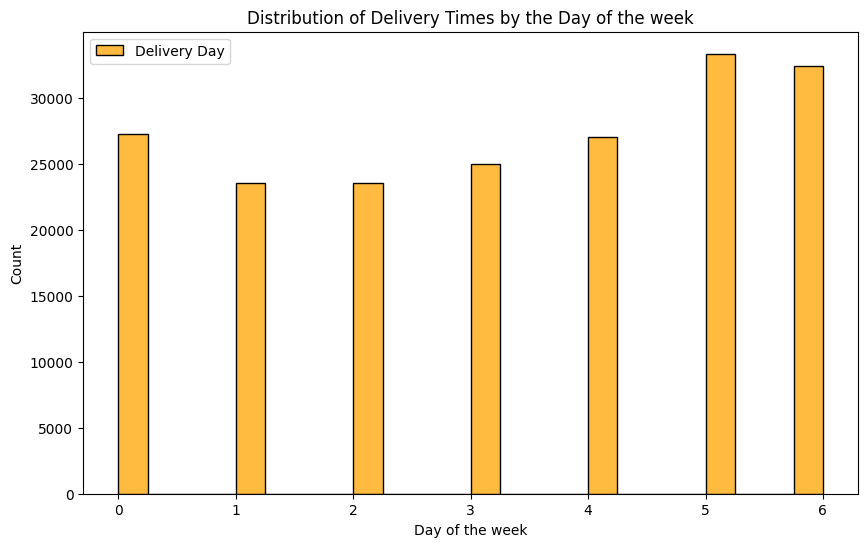

In [32]:
# Plotting the count of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_dayofweek'], bins=24, kde=False, color='orange', label='Delivery Day')
plt.title('Distribution of Delivery Times by the Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.legend()
plt.show()

Important Observation:
The visualization has revealed important patterns in Orders and deliveries.
The ordering is done either in the morning or in the evening.
The Maximum Orders and subsequent deliveries are done early in the morning and saturday is having the maximum Orders followed by Sunday.

Also the deliveries are done on the same day within a mean of 46 minutes after Ordering the items.

In [33]:
# Calculate the time difference between Order_time and Delivery_time
df['Time_difference'] = df['Delivery_time'] - df['Order_time']

# Convert Time_difference to minutes
df['Time_difference_minutes'] = df['Time_difference'].dt.total_seconds() / 60

# Print the DataFrame with the new column
df[['Order_time', 'Delivery_time', 'Time_difference', 'Time_difference_minutes']].head()

,Order_time,Delivery_time,Time_difference,Time_difference_minutes
0,2015-02-06 22:24:17,2015-02-06 23:27:16,0 days 01:02:59,62.983333
1,2015-02-10 21:49:25,2015-02-10 22:56:29,0 days 01:07:04,67.066667
8,2015-02-16 00:11:35,2015-02-16 00:38:01,0 days 00:26:26,26.433333
14,2015-02-12 03:36:46,2015-02-12 04:14:39,0 days 00:37:53,37.883333
15,2015-01-27 02:12:36,2015-01-27 03:02:24,0 days 00:49:48,49.800000


This gives us the exact timings and dates of Ordering and respective Deliveries.

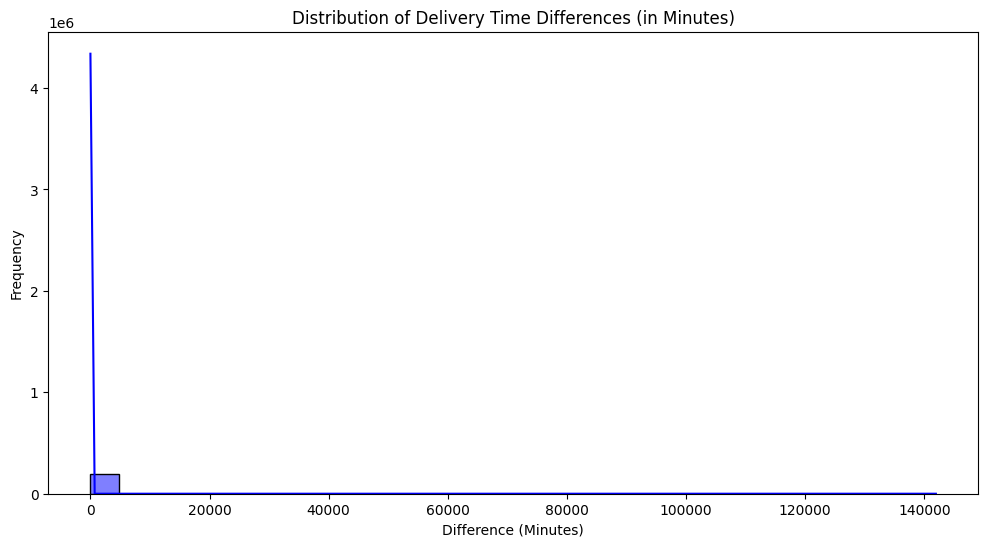

In [34]:
# The distribution of time differences
plt.figure(figsize=(12, 6))
sns.histplot(df['Time_difference_minutes'], bins=30, kde=True, color='blue')
plt.title('Distribution of Delivery Time Differences (in Minutes)')
plt.xlabel('Difference (Minutes)')
plt.ylabel('Frequency')
plt.show()

Outliers are impacting the distribution of deliveries.

In [35]:
# Summary statistics for time differences
mean_time_diff = df['Time_difference_minutes'].mean()
median_time_diff = df['Time_difference_minutes'].median()
std_time_diff = df['Time_difference_minutes'].std()

print(f"Mean Time Difference (minutes): {mean_time_diff}")
print(f"Median Time Difference (minutes): {median_time_diff}")
print(f"Standard Deviation (minutes): {std_time_diff}")


Mean Time Difference (minutes): 48.47149469486577
Median Time Difference (minutes): 44.31666666666667
Standard Deviation (minutes): 325.0370169463499


The high standard deviation indicates that there are outliers present in the data.

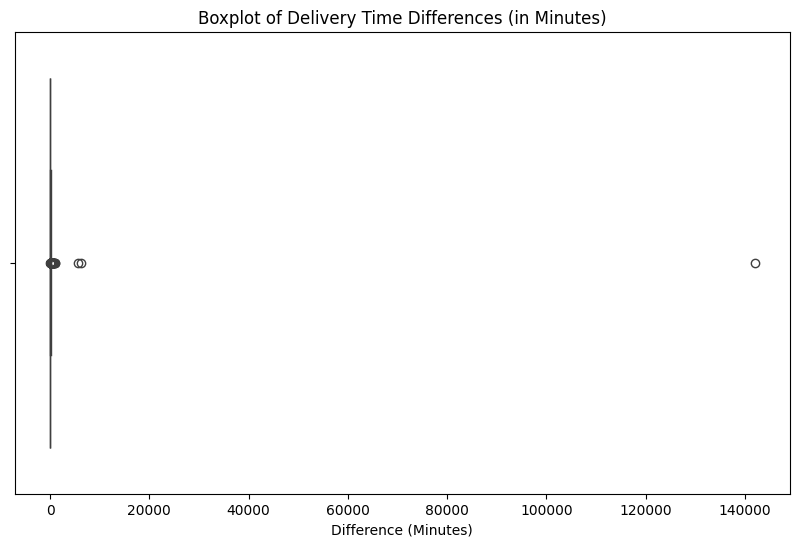

In [36]:
# Plot the distribution with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Time_difference_minutes'])
plt.title('Boxplot of Delivery Time Differences (in Minutes)')
plt.xlabel('Difference (Minutes)')
plt.show()

There is huge Outlier present in Estimated Delivery time, which is impacting the overall mean delivery time.

In [37]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Time_difference_minutes'].quantile(0.25)
Q3 = df['Time_difference_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Time_difference_minutes'] < lower_bound) | (df['Time_difference_minutes'] > upper_bound)]

In [38]:
# Remove outliers
df = df[(df['Time_difference_minutes'] >= lower_bound) & (df['Time_difference_minutes'] <= upper_bound)]

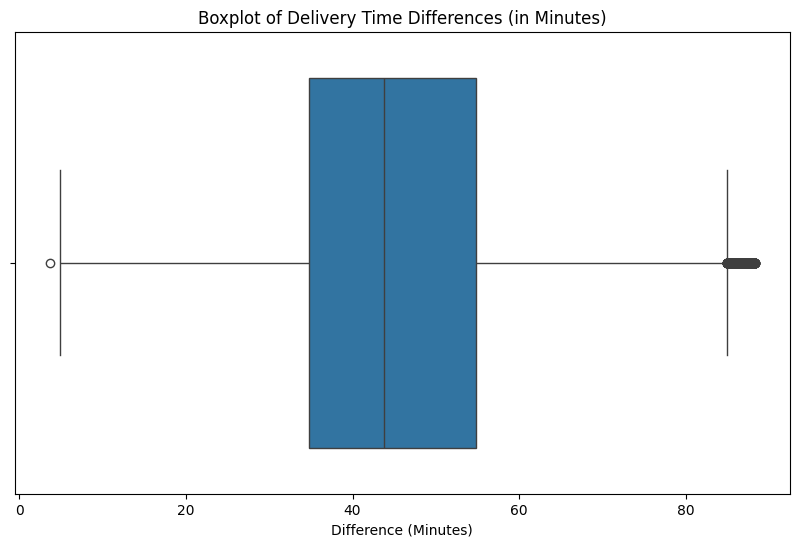

In [39]:
# Plot the distribution with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Time_difference_minutes'])
plt.title('Boxplot of Delivery Time Differences (in Minutes)')
plt.xlabel('Difference (Minutes)')
plt.show()

All Outliers are not removed by IQR method.

In [40]:
# Summary statistics for time differences after removing outliers
mean_time_diff = df['Time_difference_minutes'].mean()
median_time_diff = df['Time_difference_minutes'].median()
std_time_diff = df['Time_difference_minutes'].std()

print(f"Mean Time Difference (minutes): {mean_time_diff}")
print(f"Median Time Difference (minutes): {median_time_diff}")
print(f"Standard Deviation (minutes): {std_time_diff}")

Mean Time Difference (minutes): 45.674061418142024
Median Time Difference (minutes): 43.71666666666667
Standard Deviation (minutes): 14.743339149099523


In [41]:
# Define capping thresholds
lower_bound = df['Time_difference_minutes'].quantile(0.05)
upper_bound = df['Time_difference_minutes'].quantile(0.95)

# Remove outliers
df = df[(df['Time_difference_minutes'] >= lower_bound) & (df['Time_difference_minutes'] <= upper_bound)]

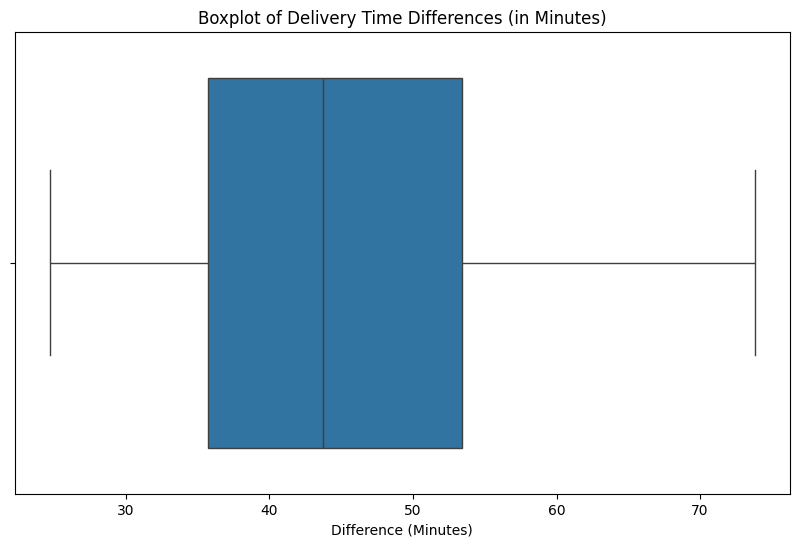

In [42]:
# Plot the distribution with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Time_difference_minutes'])
plt.title('Boxplot of Delivery Time Differences (in Minutes)')
plt.xlabel('Difference (Minutes)')
plt.show()

Therefore the clipping method was used to remove the outliers.

In [43]:
# Summary statistics for time differences after removing outliers
mean_time_diff = df['Time_difference_minutes'].mean()
median_time_diff = df['Time_difference_minutes'].median()
std_time_diff = df['Time_difference_minutes'].std()

print(f"Mean Time Difference (minutes): {mean_time_diff}")
print(f"Median Time Difference (minutes): {median_time_diff}")
print(f"Standard Deviation (minutes): {std_time_diff}")

Mean Time Difference (minutes): 45.12970146785115
Median Time Difference (minutes): 43.71666666666667
Standard Deviation (minutes): 11.910513113189719


After removing outliers in Estimated Delivery time, the Mean time of Delivery after placing the order is around 46 minutes.

# **After Removing Outliers**

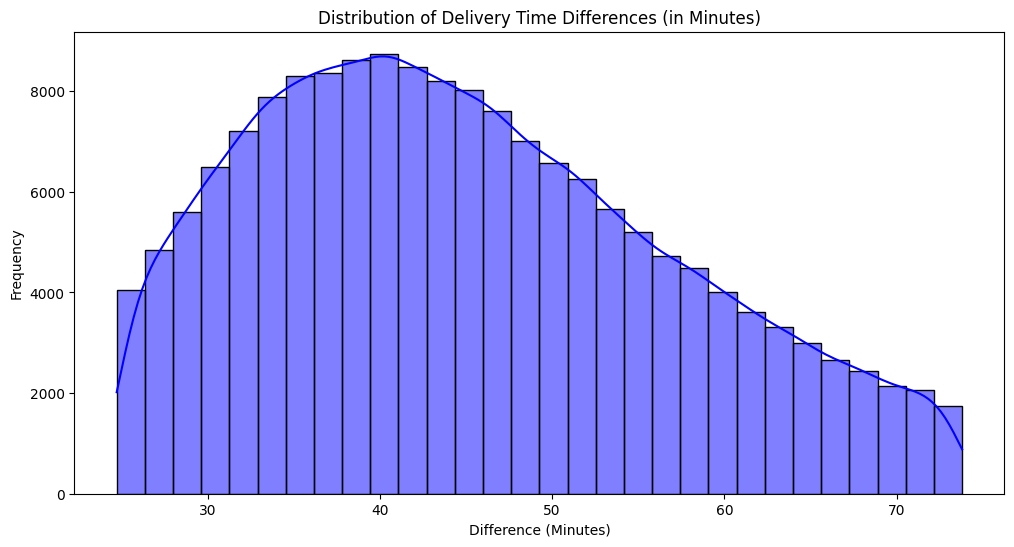

In [44]:
# The distribution of time differences
plt.figure(figsize=(12, 6))
sns.histplot(df['Time_difference_minutes'], bins=30, kde=True, color='blue')
plt.title('Distribution of Delivery Time Differences (in Minutes)')
plt.xlabel('Difference (Minutes)')
plt.ylabel('Frequency')
plt.show()

Slight Positive Skewed Distribution, indicates that the delivery time of few ordered items is very high comparatively to mean or median of the data.

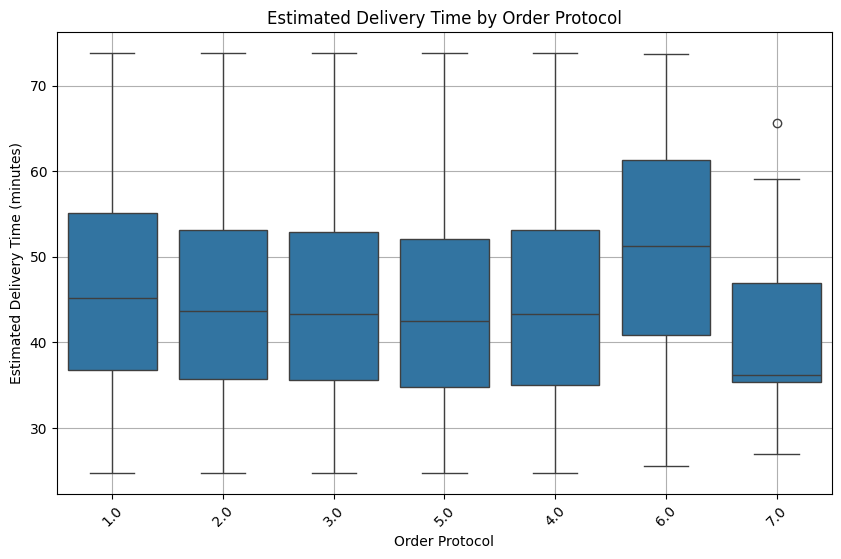

In [45]:
# Box plot of 'order_protocol' vs 'estimated_delivery_time'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='order_protocol', y='Estimated_delivery_time')
plt.title('Estimated Delivery Time by Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Estimated Delivery Time (minutes)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(True)
plt.show()

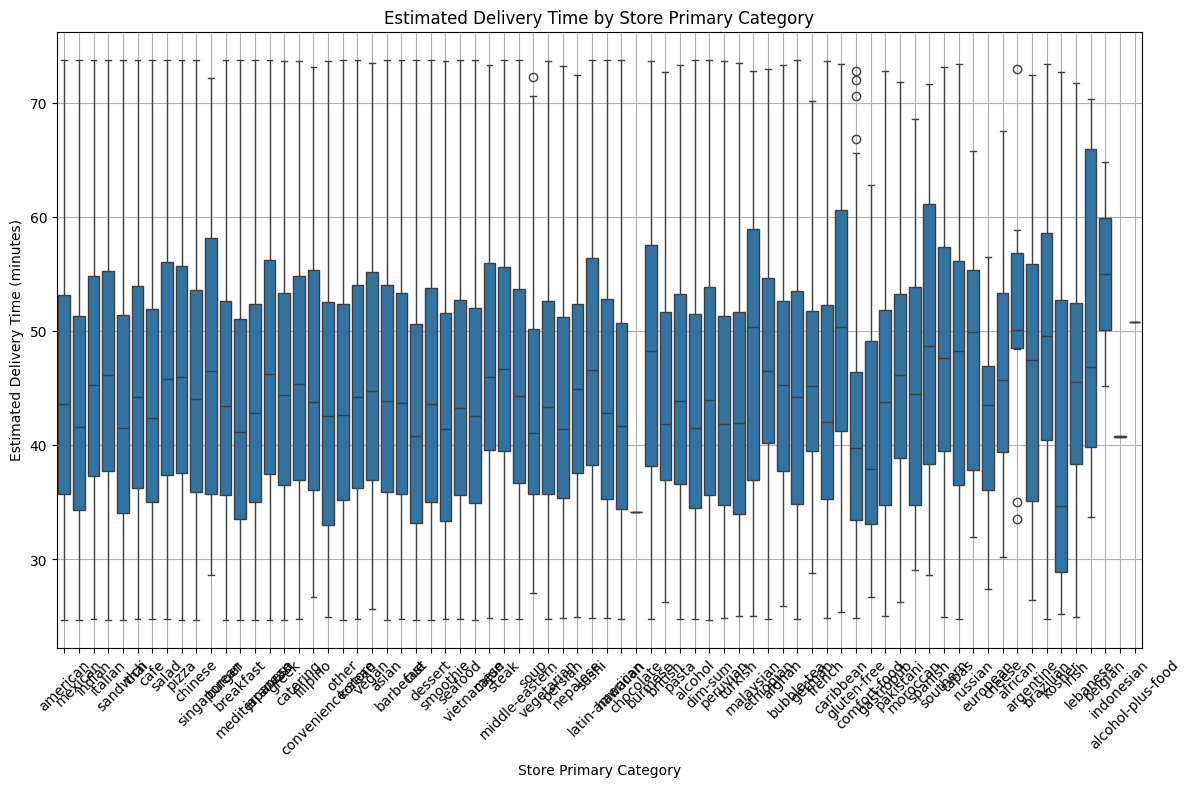

In [46]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='store_primary_category', y='Estimated_delivery_time')
plt.title('Estimated Delivery Time by Store Primary Category')
plt.xlabel('Store Primary Category')
plt.ylabel('Estimated Delivery Time (minutes)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(True)
plt.show()

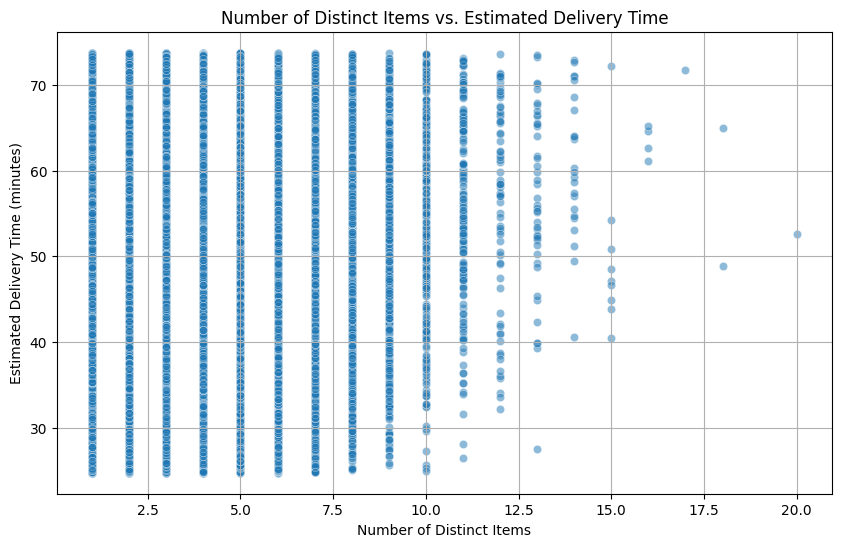

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_distinct_items', y='Estimated_delivery_time', alpha=0.5)
plt.title('Number of Distinct Items vs. Estimated Delivery Time')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Estimated Delivery Time (minutes)')
plt.grid(True)
plt.show()

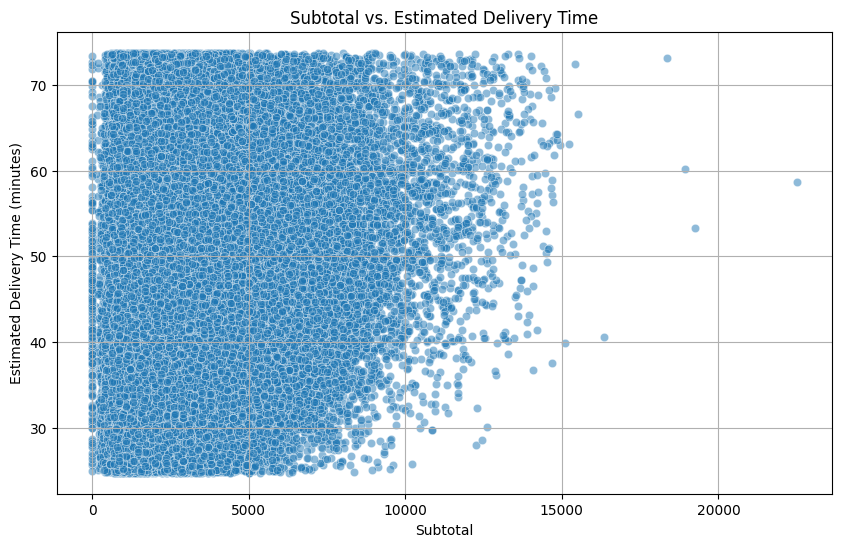

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='subtotal', y='Estimated_delivery_time', alpha=0.5)
plt.title('Subtotal vs. Estimated Delivery Time')
plt.xlabel('Subtotal')
plt.ylabel('Estimated Delivery Time (minutes)')
plt.grid(True)
plt.show()

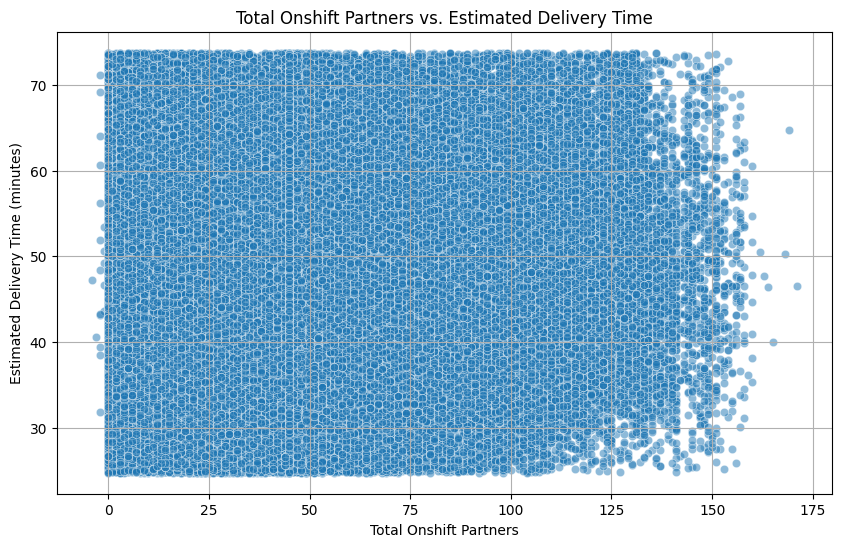

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_onshift_partners', y='Estimated_delivery_time', alpha=0.5)
plt.title('Total Onshift Partners vs. Estimated Delivery Time')
plt.xlabel('Total Onshift Partners')
plt.ylabel('Estimated Delivery Time (minutes)')
plt.grid(True)
plt.show()

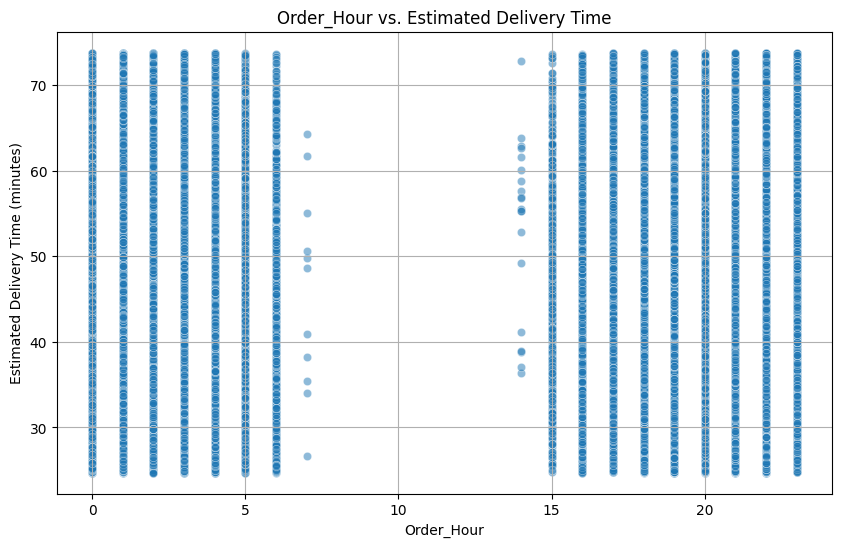

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Order_hour', y='Estimated_delivery_time', alpha=0.5)
plt.title('Order_Hour vs. Estimated Delivery Time')
plt.xlabel('Order_Hour')
plt.ylabel('Estimated Delivery Time (minutes)')
plt.grid(True)
plt.show()

# **Model Building**

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
df['Order_time'] = pd.to_datetime(df['Order_time'])
df['Delivery_time'] = pd.to_datetime(df['Delivery_time'])

df['Order_hour'] = df['Order_time'].dt.hour
df['Order_dayofweek'] = df['Order_time'].dt.dayofweek
df['Delivery_hour'] = df['Delivery_time'].dt.hour
df['Delivery_dayofweek'] = df['Delivery_time'].dt.dayofweek

# Drop the original datetime columns
df.drop(['Order_time', 'Delivery_time'], axis=1, inplace=True)


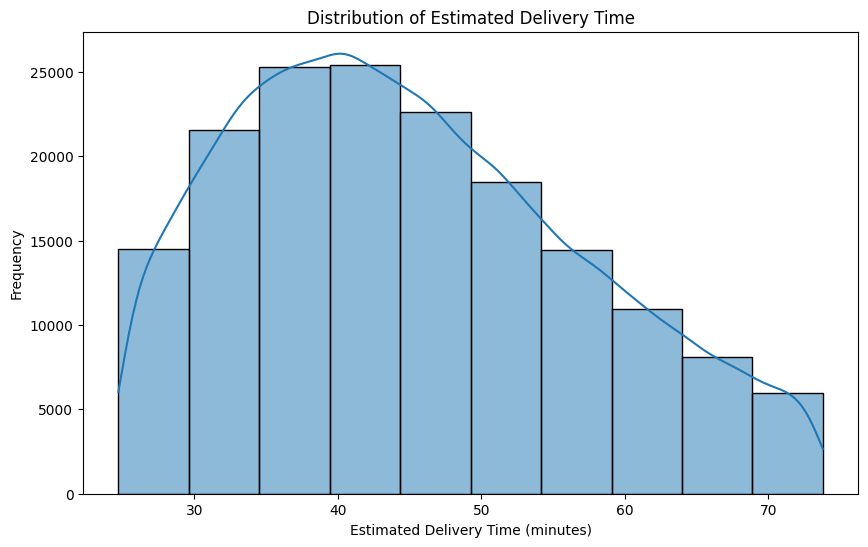

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated_delivery_time'], bins=10, kde=True)
plt.title('Distribution of Estimated Delivery Time')
plt.xlabel('Estimated Delivery Time (minutes)')
plt.ylabel('Frequency')

plt.show()

In [56]:
# Define thresholds for high and low subtotal
high_subtotal_threshold = df['subtotal'].quantile(0.75)
low_subtotal_threshold = df['subtotal'].quantile(0.25)

# Create binary flags
df['high_subtotal'] = (df['subtotal'] > high_subtotal_threshold).astype(int)
df['low_subtotal'] = (df['subtotal'] < low_subtotal_threshold).astype(int)

# Check the new columns
print(df[['subtotal', 'high_subtotal', 'low_subtotal']].head())


    subtotal  high_subtotal  low_subtotal
0       3441              1             0
1       1900              0             0
8       4771              1             0
14      1525              0             0
15      3620              1             0


In [57]:
df.drop(['store_id', 'market_id', 'Time_difference'], axis=1, inplace=True)

Encoding of Categorical Features

In [58]:
# One-hot encoding for categorical variables
categorical_features = ['store_primary_category', 'order_protocol']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [59]:
boolean_columns = df.select_dtypes(include='bool')
df[boolean_columns.columns] = boolean_columns.astype(int)

# **Train Test Split**

In [60]:
# Define features and target
X = df.drop('Estimated_delivery_time', axis=1)
y = df['Estimated_delivery_time']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [61]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Initialize the model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val))

Epoch 1/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 265.5697 - val_loss: 1.3774
Epoch 2/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.9565 - val_loss: 0.5384
Epoch 3/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4666 - val_loss: 0.4310
Epoch 4/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3380 - val_loss: 0.3230
Epoch 5/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2871 - val_loss: 0.2172
Epoch 6/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2071 - val_loss: 0.2235
Epoch 7/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.2152 - val_loss: 0.3374
Epoch 8/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1836 - val_loss: 0.1971
Epoch 9/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1890 - val_loss: 0.2072
Epoch 10/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1453 - val_loss: 0.2234
Epoch 11/20
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1294 - val_loss: 0.1020
Epoch 12/20
3346/3346 ━━

In [64]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")

# Predictions
predictions = model.predict(X_test_scaled)

1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0823
Test Loss: 0.09127610176801682
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,581 (96.02 KB)

 Trainable params: 8,193 (32.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,388 (64.02 KB)

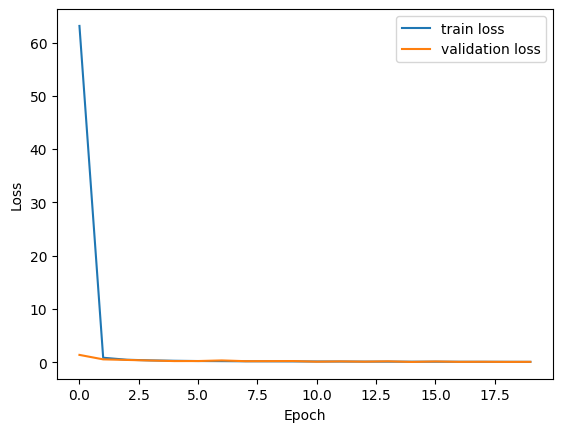

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE: 0.09127602995355445
MAE: 0.17027943262371886


In [68]:
# Fit the model with Batch size
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_scaled, y_val),
    verbose=1
)

Epoch 1/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0336 - val_loss: 0.0310
Epoch 2/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0322 - val_loss: 0.0332
Epoch 3/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0350 - val_loss: 0.0369
Epoch 4/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0361 - val_loss: 0.0597
Epoch 5/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0437 - val_loss: 0.0293
Epoch 6/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0293 - val_loss: 0.0328
Epoch 7/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0402 - val_loss: 0.0372
Epoch 8/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0303 - val_loss: 0.0811
Epoch 9/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0290 - val_loss: 0.0264
Epoch 10/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0300 - val_loss: 0.0406
Epoch 11/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0282 - val_loss: 0.0314
Epoch 12/20
1673/1673 ━━━━━━━━

In [69]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.2f}")

1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0496
Test Loss: 0.03


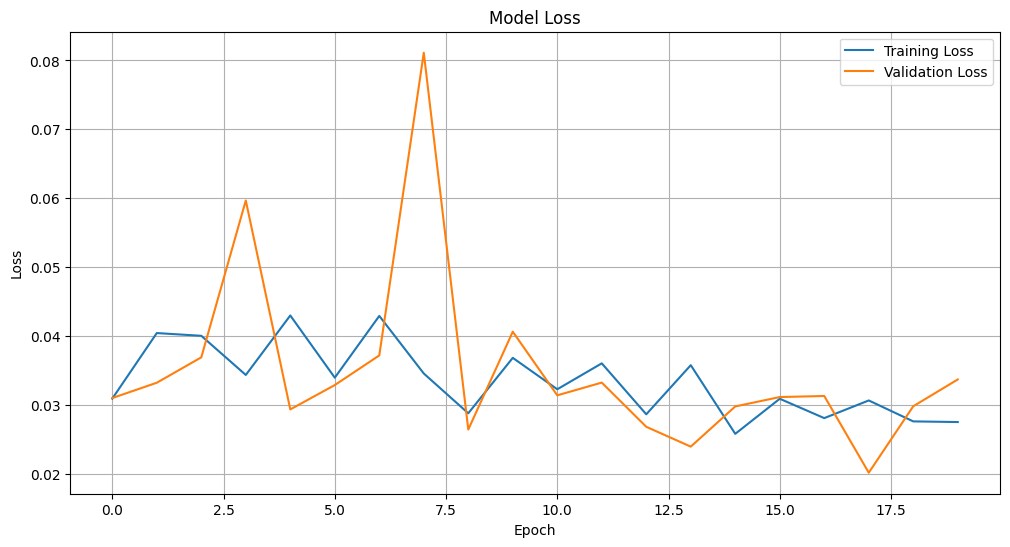

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [72]:
pip install --upgrade tensorflow keras-tuner

# **AutoEncoder & Early Stopping**

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=64, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=32, max_value=64, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))

    opt = tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-3, sampling='log'))

    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])
    return model

# Initialize the RandomSearch tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='my_dir',
    project_name='NN_Project'
)
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# Perform the search tuner & Add EarlyStopping callback
tuner.search(
    X_train_scaled,
    y_train,
    epochs=10,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping]
)

Trial 5 Complete [00h 01m 29s]
val_loss: 0.1865227222442627

Best val_loss So Far: 0.15942269563674927
Total elapsed time: 00h 07m 38s


In [74]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters.values)


Best Hyperparameters: {'units1': 64, 'units2': 32, 'learning_rate': 0.00011318443272578215}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [75]:
# Evaluate on the test set
loss, mae = best_model.evaluate(X_test_scaled, y_test)

# Print the test loss
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2533 - mae: 0.2100
Test Loss: 0.5383
Test MAE: 0.2126


# **Adding Dropout**

In [76]:
from tensorflow.keras.layers import Dropout

def build_model_with_dropout(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=32), activation='relu', input_dim=X_train.shape_scaled[1]))
    model.add(Dropout(rate=hp.Float('dropout_rate_input', min_value=0.2, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# **L2 Regularization**

In [77]:
from tensorflow.keras.regularizers import l2

def build_model_with_regularization():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [78]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val))

Epoch 1/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0874 - val_loss: 0.0741
Epoch 2/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0481 - val_loss: 0.0451
Epoch 3/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0487 - val_loss: 0.0452
Epoch 4/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0421 - val_loss: 0.0626
Epoch 5/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0425 - val_loss: 0.0332
Epoch 6/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0461 - val_loss: 0.0508
Epoch 7/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0412 - val_loss: 0.0390
Epoch 8/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0440 - val_loss: 0.0402
Epoch 9/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0416 - val_loss: 0.0386
Epoch 10/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0385 - val_loss: 0.0390


In [79]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

Epoch 1/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0385 - val_loss: 0.0427
Epoch 2/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0450 - val_loss: 0.0387
Epoch 3/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0514 - val_loss: 0.0303
Epoch 4/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0385 - val_loss: 0.0528
Epoch 5/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0395 - val_loss: 0.0657
Epoch 6/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0352 - val_loss: 0.0240
Epoch 7/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0435 - val_loss: 0.0392
Epoch 8/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0348 - val_loss: 0.0486
Epoch 9/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0356 - val_loss: 0.0527
Epoch 10/10
3346/3346 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0432 - val_loss: 0.0713


# **Adam Optimiser**

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           6,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,193 (32.00 KB)

 Trainable params: 8,193 (32.00 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Fit the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_scaled, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)


Epoch 1/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 365.0357 - val_loss: 1.9143
Epoch 2/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3171 - val_loss: 0.9042
Epoch 3/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6484 - val_loss: 0.7315
Epoch 4/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4818 - val_loss: 0.4239
Epoch 5/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4340 - val_loss: 0.3529
Epoch 6/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2614 - val_loss: 0.2655
Epoch 7/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2279 - val_loss: 0.2087
Epoch 8/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1881 - val_loss: 0.2448
Epoch 9/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2288 - val_loss: 0.2006
Epoch 10/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1676 - val_loss: 0.1941
Epoch 11/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1967 - val_loss: 0.1299
Epoch 12/20
1673/1673 ━━━━━━

In [97]:
# Predict on new data
predictions = model.predict(X_test_scaled)

# If you need to see the first few predictions
print(predictions[:5])


1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[64.91389 ]
 [55.06245 ]
 [27.690313]
 [25.181135]
 [50.309696]]


In [98]:
loss= model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}')

1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2332
Test Loss: 0.1843


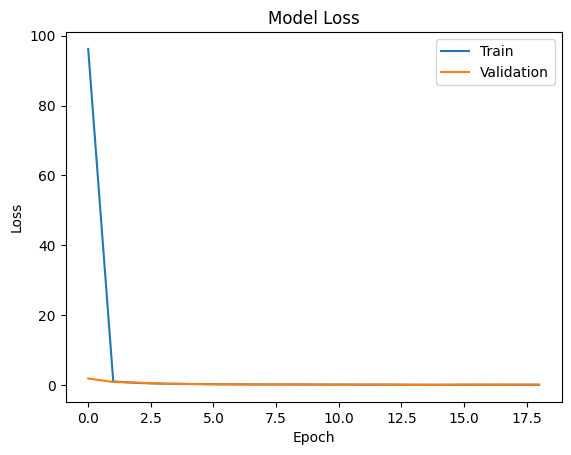

In [99]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# **Saving The Mode**

In [100]:
# Save the entire model
model.save('my_model.h5')

# **Stochastic Gradient Descent (SGD) optimizer**

In [85]:
from tensorflow.keras.optimizers import SGD

# Define the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model with a reduced learning rate and gradient clipping
optimizer = SGD(learning_rate=0.001, momentum=0.9, clipnorm=1.0)
model.compile(
    optimizer=optimizer,
    loss='mean_squared_error'
)

# Fit the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_scaled, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

# Predict on new data
predictions = model.predict(X_test_scaled)
print(predictions[:5])

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 668.4644 - val_loss: 11.3098
Epoch 2/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.2187 - val_loss: 5.2909
Epoch 3/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8795 - val_loss: 3.1401
Epoch 4/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4415 - val_loss: 1.8391
Epoch 5/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2623 - val_loss: 1.3655
Epoch 6/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7172 - val_loss: 1.1367
Epoch 7/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2540 - val_loss: 0.7738
Epoch 8/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5471 - val_loss: 0.6694
Epoch 9/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6029 - val_loss: 0.6049
Epoch 10/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1898 - val_loss: 0.4426
Epoch 11/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1420 - val_loss: 0.2864
Epoch 12/20
1673/1673 ━━━━━━━━━━━━━━━━

# **RMSprop Optimizer**

In [86]:
from tensorflow.keras.optimizers import RMSprop
# Define the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='mean_squared_error'
)

# Fit the model
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

# Predict on new data
predictions = model.predict(X_test_scaled)
print(predictions[:5])

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 372.0946 - val_loss: 47.6122
Epoch 2/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 60.0373 - val_loss: 49.8596
Epoch 3/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 28.9049 - val_loss: 3.1068
Epoch 4/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 18.9836 - val_loss: 38.8569
Epoch 5/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14.2537 - val_loss: 1.4692
Epoch 6/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 11.0765 - val_loss: 6.7130
Epoch 7/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.7694 - val_loss: 21.1703
Epoch 8/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.5389 - val_loss: 2.2580
Epoch 9/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 6.6464 - val_loss: 1.8834
Epoch 10/20
1673/1673 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.0265 - val_loss: 1.4933
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[2.4678988 ]
 [1.7510136 ]
 [0.42895016]
 [0.38255382]
 [1.11356

# **Ten Questions**

1. Defining the Problem Statements and Their Modifications
Problem Statement:
The primary goal is to predict delivery times for orders based on various features such as order details, store information, and delivery partner availability. Accurate delivery time predictions can enhance operational efficiency, improve customer satisfaction, and optimize resource allocation.

Modifications and Uses:

Real-Time Prediction: Integrate the model into a real-time system for live delivery time estimates.
Anomaly Detection: Adapt the model to identify and flag unusual delays or performance issues.
Dynamic Routing: Use predictions to optimize delivery routes based on estimated delivery times.
Resource Planning: Adjust the model to forecast busy periods and plan staffing accordingly.


2. Three Pandas Datetime Functions
pd.to_datetime():

Explanation: Converts a string or integer to a datetime object.
Example: pd.to_datetime('2024-08-23')
datetime.now():

Explanation: Returns the current local date and time.
Example: datetime.now()
pd.DatetimeIndex:

Explanation: Provides access to datetime properties and methods for a series or DataFrame.
Example: pd.DatetimeIndex(df['created_at']).year


3. Short Note on DateTime, Timedelta, and TimeSpan (Period)
datetime:

Description: Represents a specific moment in time, including year, month, day, hour, minute, second, and microsecond.
Usage: Used to create and manipulate individual date and time values.
Example: datetime(2024, 8, 23, 14, 30)
timedelta:

Description: Represents a difference between two dates or times. It can be used to perform arithmetic operations with datetime objects.
Usage: Useful for calculating durations and adding/subtracting time.
Example: timedelta(days=5)
TimeSpan (Period):

Description: Represents a span of time with a specified frequency, like days or months, and is used to work with ranges of dates or times.
Usage: Helps in analyzing and manipulating time series data.
Example: pd.Period('2024-08', freq='M')


4. Why Check for Outliers
Outliers can significantly skew statistical analyses and model performance. Identifying and handling outliers is crucial because:

Model Accuracy: Outliers can affect the training process and degrade model accuracy.
Data Quality: Ensuring data quality and consistency.
Insights: Outliers may reveal important insights or errors in data collection.


5. Three Outlier Removal Methods
Z-Score Method:

Description: Identifies outliers by measuring how far a data point is from the mean in terms of standard deviations.
Example: Data points with a z-score greater than 3 are considered outliers.
IQR (Interquartile Range) Method:

Description: Uses the range between the first (25th percentile) and third quartile (75th percentile) to identify outliers.
Example: Values outside 1.5 * IQR from Q1 and Q3 are outliers.
Box Plot Method:

Description: Visualizes outliers using a box plot, which shows the spread and outlier points.
Example: Points outside the "whiskers" of a box plot are typically outliers.


6. Classical Machine Learning Methods for This Problem
Linear Regression:

Description: Predicts continuous outcomes based on linear relationships between features.
Usage: Simple and interpretable; effective if relationships are linear.
Decision Trees:

Description: Builds a tree-like model of decisions and their possible consequences.
Usage: Handles non-linear relationships and interactions between features.
Random Forest:

Description: An ensemble of decision trees that improves prediction accuracy and controls overfitting.
Usage: Effective for capturing complex relationships and reducing overfitting.


7. Why Scaling is Required for Neural Networks
Scaling is crucial for neural networks because:

Gradient Descent Efficiency: Neural networks use gradient descent to update weights; scaling ensures that gradients are balanced and converge faster.

Numerical Stability: Scaling helps in maintaining numerical stability during training, preventing issues like vanishing or exploding gradients.

Activation Functions: Ensures that input values are within a range where activation functions (e.g., ReLU) operate effectively.


8. Choice of Optimizer
Adam (Adaptive Moment Estimation):

Explanation: Adam combines the advantages of AdaGrad and RMSprop with momentum. It adapts learning rates for each parameter and maintains moving averages of both gradients and squared gradients.

Advantage:
Adaptive Learning Rates: Adjusts learning rates automatically.

Momentum: Incorporates past gradients to smooth out updates.

Efficiency: Generally performs well across a range of problems with minimal tuning.

In [87]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

9. Choice of Activation Function
ReLU (Rectified Linear Unit):

Explanation: ReLU is used in hidden layers due to its efficiency and ability to mitigate vanishing gradient problems.

Advantage:
Computationally Efficient: Simple and fast to compute.

Mitigates Vanishing Gradient: Allows gradients to pass through during backpropagation.

In [88]:
model.add(Dense(64, activation='relu'))

10. Why Neural Networks Perform Well on Large Datasets
Neural networks perform well on large datasets due to:

Learning Complex Patterns: Large datasets provide sufficient examples for neural networks to learn intricate patterns and relationships.
Overfitting Reduction: More data helps in reducing overfitting by providing a more comprehensive representation of the problem space.
Generalization: Large datasets help the network generalize better, improving performance on unseen data.

In [101]:
# Load the model
loaded_model = tf.keras.models.load_model('my_model.h5')

# Check the model summary to ensure it was loaded correctly
loaded_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           6,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,195 (32.02 KB)

 Trainable params: 8,193 (32.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [102]:
# Use the loaded model to make predictions
delivery_predictions = loaded_model.predict(X_test_scaled)

# Print the first few predictions
print(delivery_predictions[:5])

1046/1046 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[64.91389 ]
 [55.06245 ]
 [27.690313]
 [25.181135]
 [50.309696]]


# **Recommendations**

Optimizing Delivery Times: We have to Adjust staff and delivery partners to align with peak Hour demands as we have seen a typical pattern for Orders.

We can Provide more accurate delivery time estimates to customers based on the model’s predictions, thereby improving customer satisfaction.